<a href="https://colab.research.google.com/github/SHANMUGA000/DECISION-TREE-CLASSIFIER-FOR-MUSHROOM-DATASET/blob/main/Decision_Tree_Classifier_for_Mushroom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [3]:
from sklearn.model_selection import train_test_split


# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install gsearch

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion': ('gini', 'entropy'),
              'min_samples_split': [2, 3, 4, 5],
              'max_depth': [9, 10, 11, 12],
              'class_weight': ('balanced', None),
             }

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_


In [17]:
score = model.score(X_test, y_test)
score

1.0

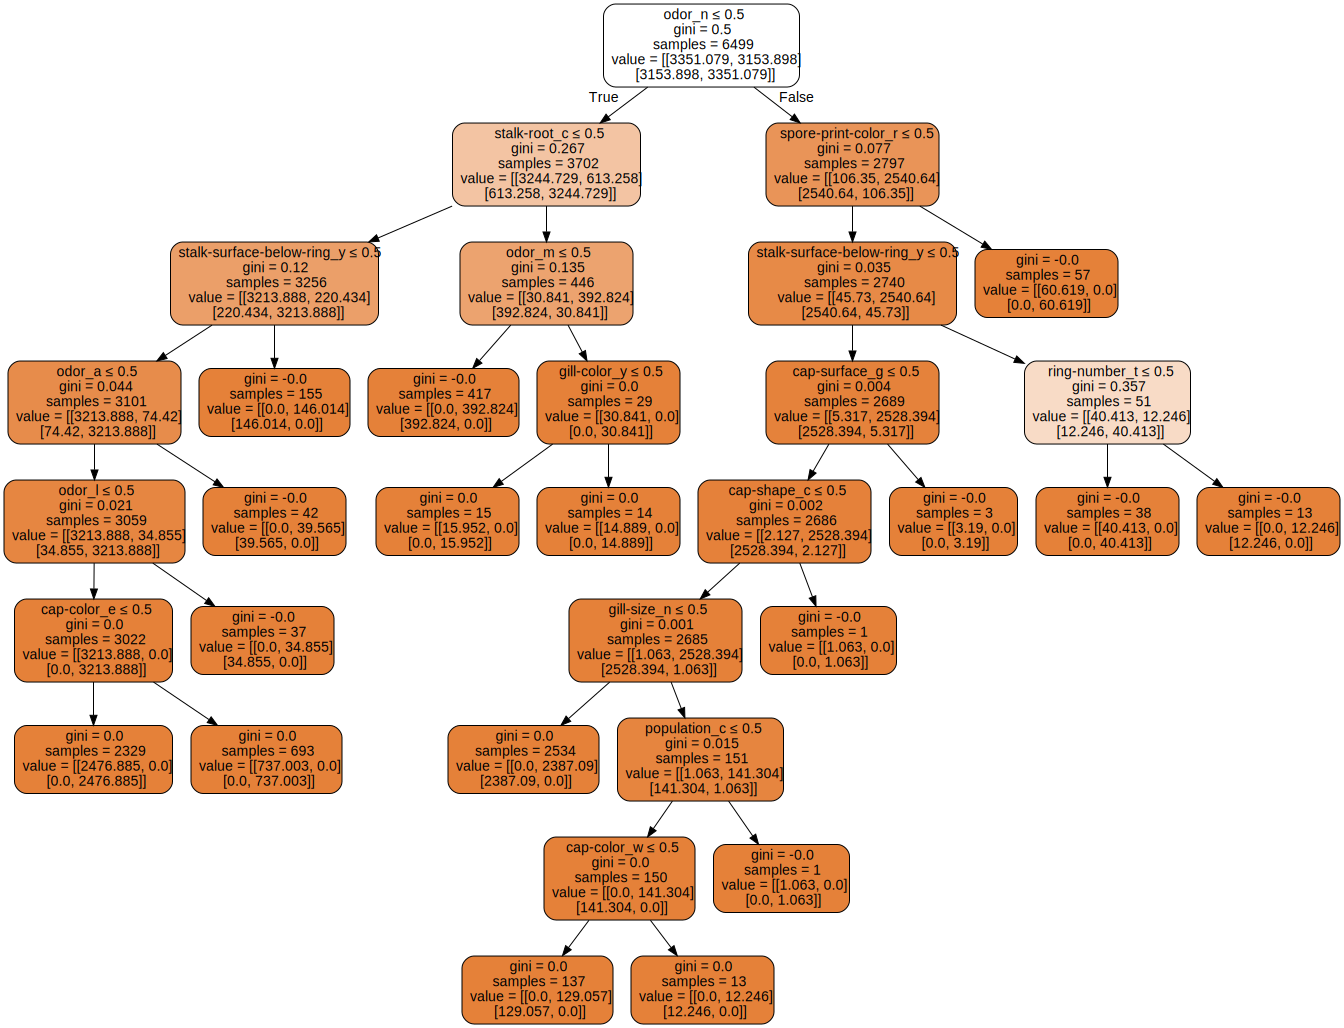

In [18]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=y_test.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph